# Obesity Dataset Preprocessing Notebook
This notebook handles:
- Loading the dataset
- Handling missing values and outliers
- Encoding categorical variables
- Performing a train-test split


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [90]:
df.duplicated().sum()

np.int64(24)

In [91]:
df.drop_duplicates(inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.356493,6.379977,14.00,20.000,23.000,26.000,61.00
Height,2087.0,1.702616,0.093251,1.45,1.630,1.700,1.770,1.98
Weight,2087.0,86.858706,26.190838,39.00,66.000,83.100,108.015,173.00
FCVC,2087.0,2.421409,0.534807,1.00,2.000,2.400,3.000,3.00
NCP,2087.0,2.701203,0.764655,1.00,2.700,3.000,3.000,4.00
CH2O,2087.0,2.004792,0.608281,1.00,1.590,2.000,2.465,3.00
FAF,2087.0,1.012827,0.853496,0.00,0.125,1.000,1.680,3.00
TUE,2087.0,0.663031,0.608152,0.00,0.000,0.631,1.000,2.00


In [94]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [95]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Categorical Columns:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [96]:
target_col = 'NObeyesdad'
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

In [97]:
print("\nCategorical Columns:")
print(categorical_cols)


Categorical Columns:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [98]:
df.nunique()

Gender                               2
Age                                 40
Height                              51
Weight                            1335
family_history_with_overweight       2
FAVC                                 2
FCVC                               180
NCP                                256
CAEC                                 4
SMOKE                                2
CH2O                               201
SCC                                  2
FAF                                257
TUE                                813
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [99]:
import seaborn as sns

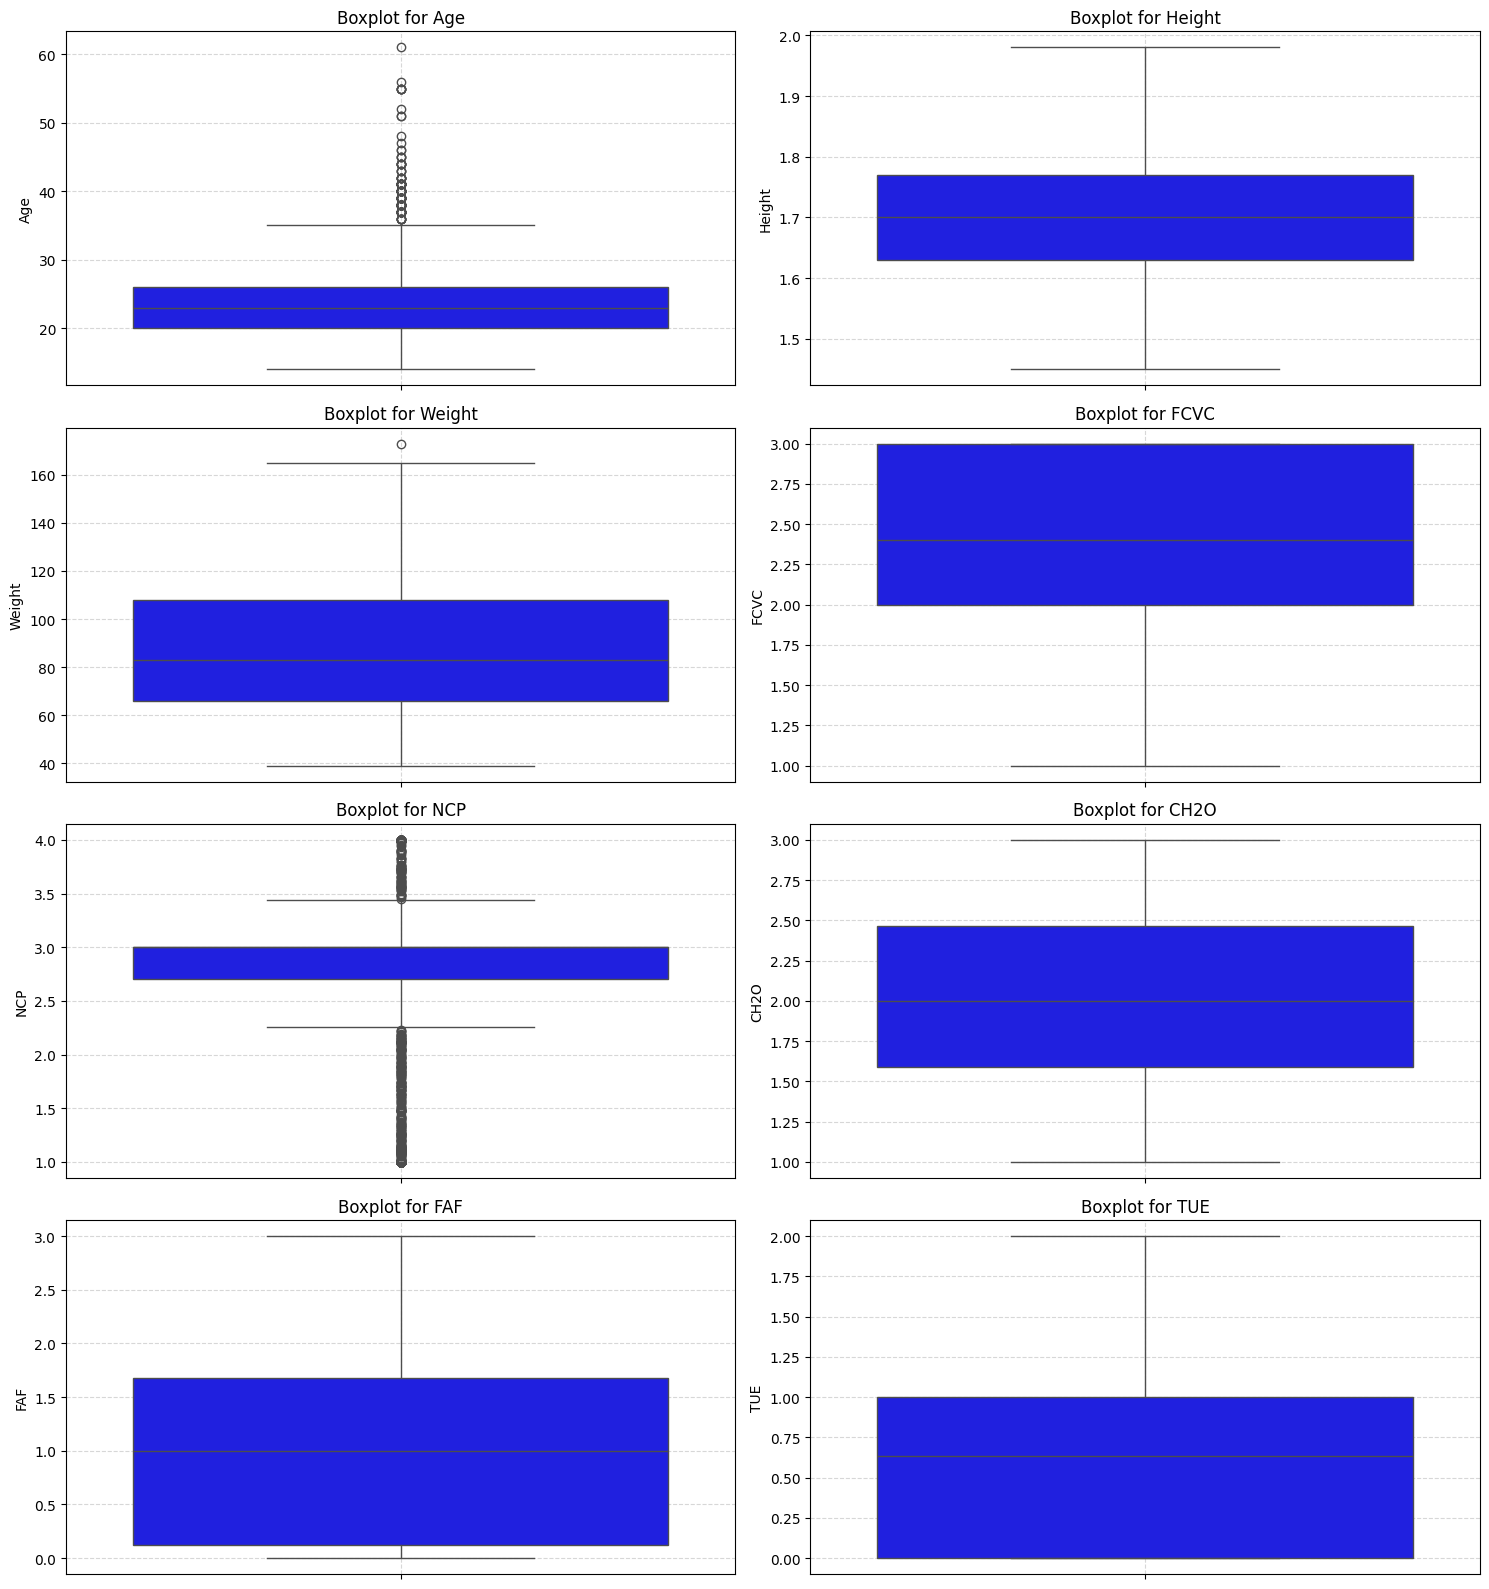

In [100]:
def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    
    if nrows == 1:
        axes = [axes] if ncols == 1 else axes.reshape(1, -1)
    
    for i, column in enumerate(columns):
        row = i // ncols
        col = i % ncols
        ax = axes[row][col] if nrows > 1 else axes[col]

        sns.boxplot(y=data[column], ax=ax, color='blue')
        ax.set_title(f'Boxplot for {column}')
        ax.set_xlabel('')
        ax.grid(True, linestyle='--', alpha=0.5)

    
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j // ncols][j % ncols])

    plt.tight_layout()
    plt.show()


plot_boxplots(df, numerical_cols)

In [101]:
def check_outliers(df: pd.DataFrame, c: str, show: bool = True) -> tuple:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    IQR = q3 - q1
    low_b = q1 - IQR * 1.5
    high_b = q3 + IQR * 1.5
    outliers = df[(df[c] < low_b) | (df[c] > high_b)]
    if show:
        print(f"Outliers share: {len(outliers) / len(df):.2f}%\n")
        print(outliers[c].head(3), "\n")
        df[c].plot.box()
        plt.title(f'Boxplot for {c}')
        plt.show()
    return low_b, high_b, outliers

Outliers share: 0.00%

344    173.0
Name: Weight, dtype: float64 



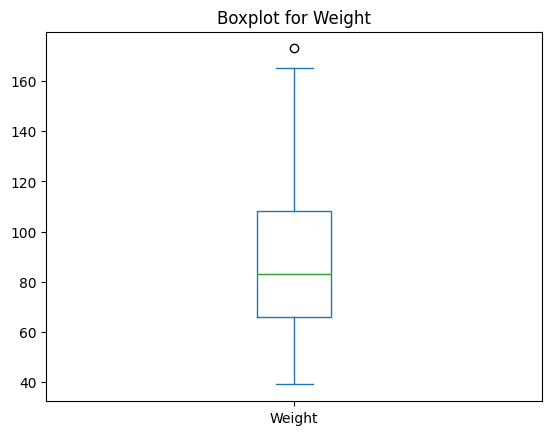

,Weight,NObeyesdad
344,173.0,Obesity_Type_III


In [102]:
_, _, outlier = check_outliers(df, "Weight")

outlier[["Weight", "NObeyesdad"]]

Outliers share: 0.28%

4     1.0
14    1.0
16    1.0
Name: NCP, dtype: float64 



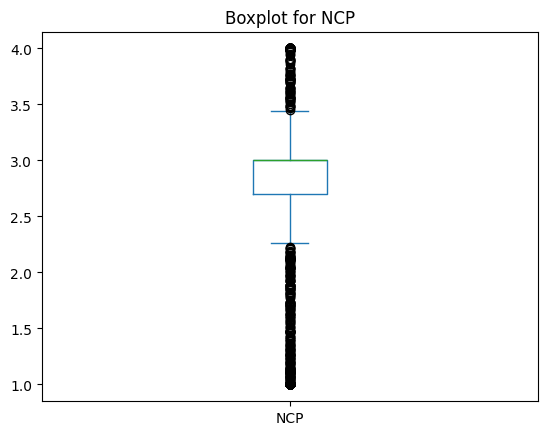

Low bound: 2.2500000000000004, Hight bound: 3.4499999999999997


,NCP,NObeyesdad
4,1.00,Overweight_Level_II
14,1.00,Normal_Weight
16,1.00,Overweight_Level_II
17,1.00,Obesity_Type_I
18,4.00,Overweight_Level_II
...,...,...
1794,2.14,Obesity_Type_II
1795,1.44,Obesity_Type_II
1796,1.34,Obesity_Type_II
1797,1.21,Obesity_Type_II


In [103]:
l, h, outlier = check_outliers(df, "NCP")

print(f"Low bound: {l}, Hight bound: {h}")

outlier[["NCP", "NObeyesdad"]]

In [104]:
df[["NCP"]].describe()

,NCP
count,2087.000000
mean,2.701203
std,0.764655
min,1.000000
25%,2.700000
50%,3.000000
75%,3.000000
max,4.000000


### It doesn't appear that these are outliers, but rather outliers that are acceptable.

In [105]:
print(df.columns.tolist())

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [106]:
print(categorical_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [107]:
# 1. Binary Variables (Label Encoding)
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
df[binary_cols] = df[binary_cols].apply(LabelEncoder().fit_transform)

In [111]:
encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',  # Handles unseen categories
    unknown_value=-1,  # Assigns -1 to unknown values
    dtype=int
)

df[['CAEC', 'CALC']] = encoder.fit_transform(df[['CAEC', 'CALC']])

In [112]:
print(df[['CAEC', 'CALC']].head())

   CAEC  CALC
0     1     3
1     1     2
2     1     1
3     1     1
4     1     2


In [113]:
# 3. Nominal Variables (One-Hot Encoding)
nominal_cols = ['MTRANS']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [114]:
print(df.head())
print("\nEncoded columns:", df.columns.tolist())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC           NObeyesdad  \
0  3.0     1      0   2.0    0  0.0  1.0     3        Normal_Weight   
1  3.0     1      1   3.0    1  3.0  0.0     2        Normal_Weight   
2  3.0     1      0   2.0    0  2.0  1.0     1        Normal_Weight   
3  3.0     1      0   2.0    0  2.0  0.0     1   Overweight_Level_I   
4  1.0     1      0   2.0    0  0.0  0.0     2  Overweight_Level_II   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0        False         

In [115]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,3,Normal_Weight,False,False,True,False
1,0,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,Normal_Weight,False,False,True,False
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,1,Normal_Weight,False,False,True,False
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,1,Overweight_Level_I,False,False,False,True
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,2,Overweight_Level_II,False,False,True,False


In [117]:
df.to_csv('preprocessed_obesity_dataset.csv', index=False)